# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [3]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [21]:
DATASET_PATH = "../data/college_student_placement_dataset.csv"
RANDOM_STATE = 45  # DO NOT CHANGE THIS RANDOM STATE.
print(DATASET_PATH)

../data/college_student_placement_dataset.csv


## Preliminary Inspection

See what the raw file looks like!

In [23]:
# preliminary path created an error so we'll get the $pwd
import os
print(os.getcwd())

/Users/akkeem/Documents/ClassAssignments/TTPR/Class-Exercises/ds-fall-2025-fri-0630/Week-07-Classification/exercise


In [22]:
# Look at the first 5 lines of the raw contents of the file first.

with open(DATASET_PATH, "r") as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break  # Stop; there are less than 5 lines.

College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [24]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [26]:
# Identify which columns have null values.
df.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [29]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

np.int64(0)

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
# There are no categorical values in this df

## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [34]:
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,No
1,CLG0061,97,5.52,5.37,8,0,7,8,0,No
2,CLG0036,109,5.36,5.83,9,0,3,1,1,No
3,CLG0055,122,5.47,5.75,6,1,1,6,1,No
4,CLG0004,96,7.91,7.69,7,0,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,0,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,0,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,1,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,0,7,5,1,No


❔ When should you use this versus using `pd.get_dummies`?
We should use this (direct mapping) when the column is binary, that means when it only has 2 possible categories, otherwise we use pd.get_dummies which woould create a new column for each new category

# Visualization with `sns.pairplot`

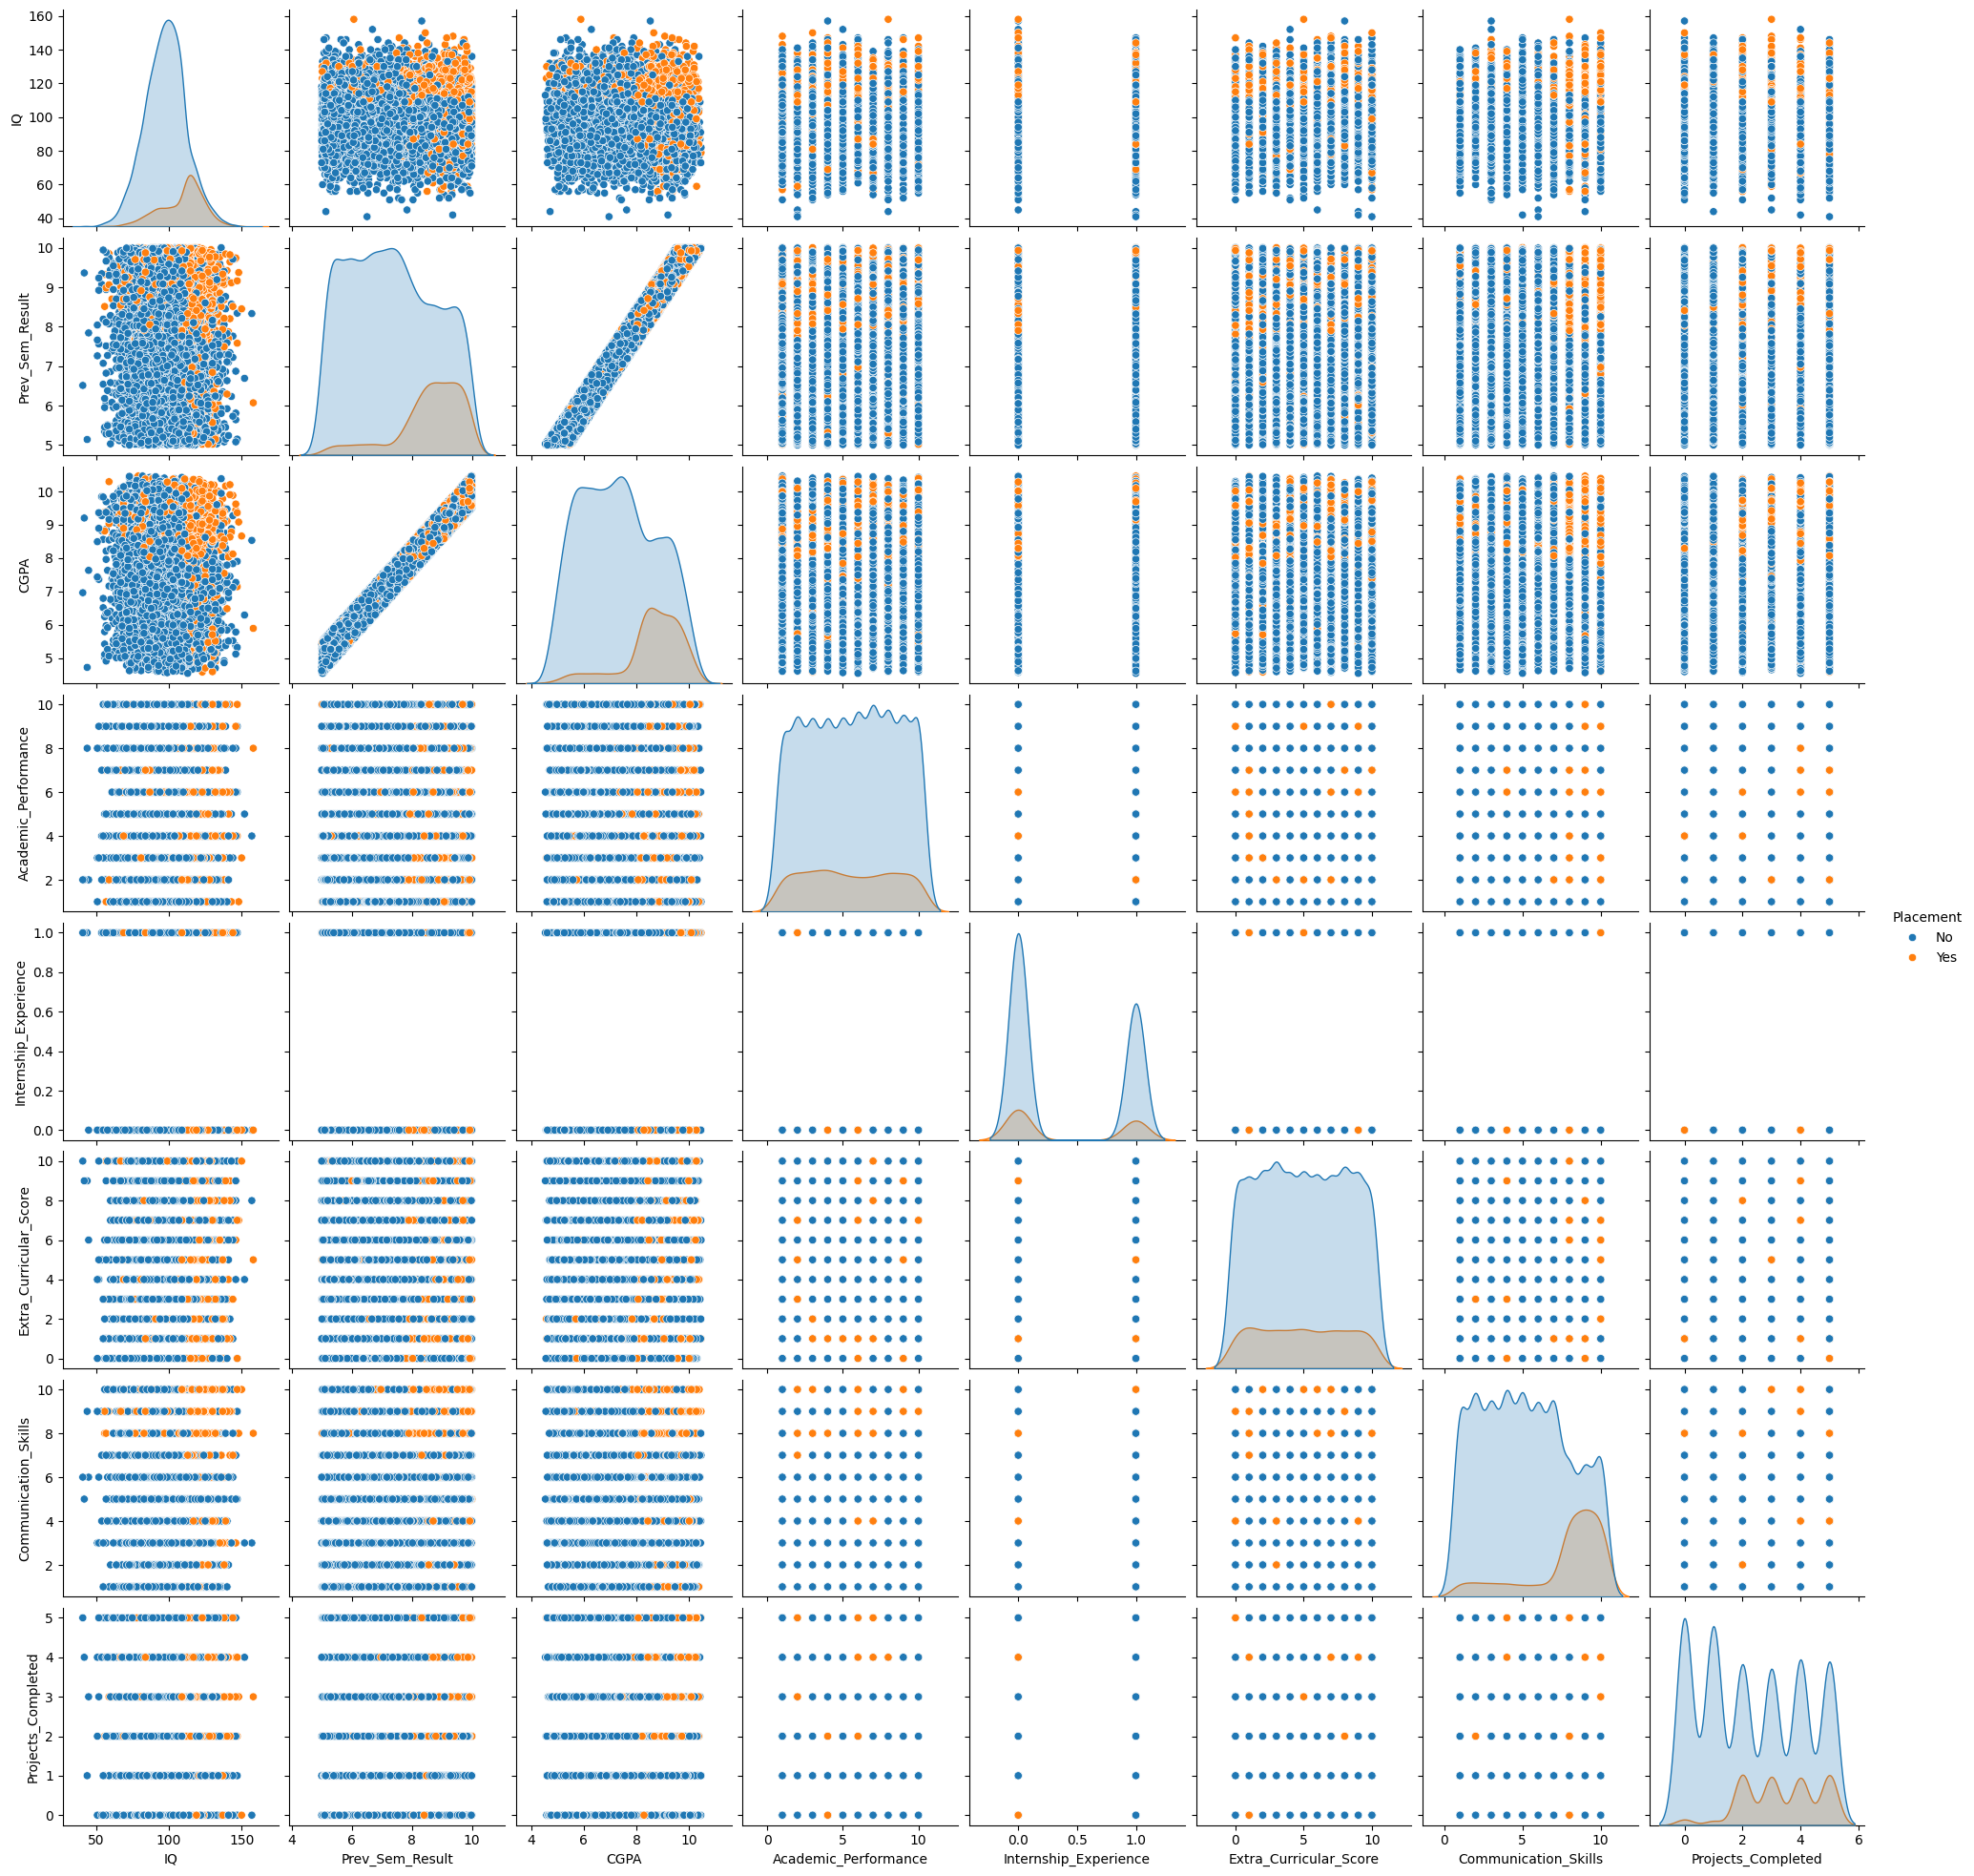

In [36]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue='Placement')
plt.show()

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [ ]:
# Set X to the desired features.
x = df[['IQ', 'Internship_Experience']]

# Set y to be our target variable.
y = df['Placement']

## Split to Testing and Training Datasets 

In [60]:
# Split our data into testing and training pairs.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

# Print the length and width of our testing data.
print("x_train: %d rows, %d columns" % x_train.shape)
print("x_test: %d rows, %d columns" % x_test.shape)
print("y_train: %d rows, 1 column" % y_train.shape)
print("y_test: %d rows, 1 column" % y_test.shape)

x_train: 8000 rows, 2 columns
x_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [61]:
# Initialize our logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [ ]:
# 1. Make predictions of your test data and save them as `y_pred`.

y_pred = model.predict(x_test)
y_pred

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [ ]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy Score: %f" % accuracy )
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score: %f' % f1)

Plot a confusion matrix of your predicted results.

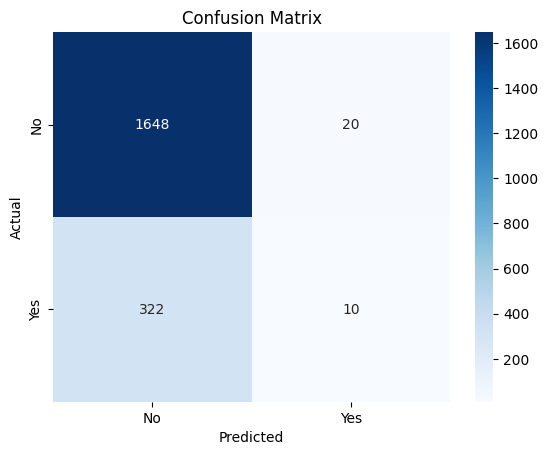

In [66]:
# 3. Plot a confusion matrix of your predicted results.
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

How many true positives and true negatives did your model get?

In [67]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1648
True Positives: 10


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [69]:
# Add a constant term to the independent variables.

X_const = sm.add_constant(x)

# Fit the model.

logit_model = sm.Logit(y.map({'No':0, 'Yes':1}), X_const)
result = logit_model.fit()

# Print the summary and interpret the results.
print(result.summary())


# Interpretation:
print("\nThe feature that is the most important for predicting placement is IQ. ")

Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        14:38:36   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4077      0.224    -33.142      0.000      -7.846      -6.

# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data.


# Print each of our scores to inspect performance.


# Plot the confusion matrix.